In [10]:
import pandas as panda
import seaborn as sea
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
import matplotlib.pyplot as plot

nltk.download('stopwords')
stopwords = stopwords.words('portuguese')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rubens.sousa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
dados = panda.read_csv('results.csv')
campos_de_texto = dados['text']

tokenizer = RegexpTokenizer(r'\b[^\d\W]+')

tokens = []

for doc in campos_de_texto:
    tokens += tokenizer.tokenize(doc.lower())

tokens_filtrados = []

for token in tokens:
    if ((token not in stopwords) and (len(token) > 2)):
        tokens_filtrados.append(token)

frequencia = nltk.FreqDist(tokens_filtrados)

## 1. Reproduza a tabela 4.1 do livro texto calculando as estatísticas para sua coleção (5 pts).

In [12]:
c_documentos = len(campos_de_texto)
c_palavras = len(tokens_filtrados)
c_vocabulario = len(set(tokens_filtrados))
ocorrencia_uma_palavra = 0
ocorrencias_maior_1000 = 0

for chave in frequencia.keys():
    if frequencia[chave] == 1000:
        ocorrencias_maior_1000 += 1
    elif frequencia[chave] == 1:
        ocorrencia_uma_palavra += 1

tabela_1 = panda.DataFrame(data = {'Info': ['Total of Documents',
                                       'Total of Words',
                                       'Lenght of Vocabulary',
                                       'Words that occur one time',
                                       'Words that occur more than 1000 times'],
                              'Results': [c_documentos,
                                          c_palavras,
                                          c_vocabulario,
                                          ocorrencia_uma_palavra,
                                          ocorrencias_maior_1000]})

tabela_1

,Info,Results
0,Total of Documents,132
1,Total of Words,22273
2,Lenght of Vocabulary,6590
3,Words that occur one time,3460
4,Words that occur more than 1000 times,0


## 2. Reproduza a tabela 4.2 do livro considerando as top-50 palavras mais frequentes de sua coleção (5 pts).

In [13]:
frequency_data_frame = panda.DataFrame(frequencia.most_common(50), columns = ['word', 'frequencia'])
frequency_data_frame['r'] = frequency_data_frame['frequencia'].rank(ascending = False)
frequency_data_frame['Pr'] = frequency_data_frame['frequencia'] / len(tokens)
frequency_data_frame['Pr %'] = (frequency_data_frame['frequencia'] / len(tokens) * 100)
frequency_data_frame['r.Pr'] = frequency_data_frame['r'] * (frequency_data_frame['frequencia'] / len(tokens))
frequency_data_frame

,word,frequency,r,Pr,Pr %,r.Pr
0,presidente,219,1.0,0.005536,0.553617,0.005536
1,lula,197,2.0,0.004980,0.498003,0.009960
2,bolsonaro,173,3.0,0.004373,0.437333,0.013120
3,brasil,153,4.0,0.003868,0.386774,0.015471
4,disse,128,5.0,0.003236,0.323576,0.016179
5,governo,125,6.0,0.003160,0.315992,0.018960
6,feira,86,7.0,0.002174,0.217402,0.015218
7,ser,85,8.0,0.002149,0.214874,0.017190
8,sobre,81,9.0,0.002048,0.204763,0.018429
9,ano,79,10.0,0.001997,0.199707,0.019971


## 3. Plote curvas de rank-frequência (usando escala logarítmica) para palavras e bigramas na coleção que você coletou na atividade anterior. Quais os melhores valores do parâmetro c para cada curva (5 pts)?

In [14]:
diagramas = []

diagramas = nltk.bigrams(tokens_filtrados)

diagramas_de_freq = nltk.FreqDist(diagramas)

diagramas_df = panda.DataFrame(diagramas_de_freq.most_common(), columns=['word', 'frequencia'])
diagramas_df['r'] = diagramas_df['frequencia'].rank(ascending = False)

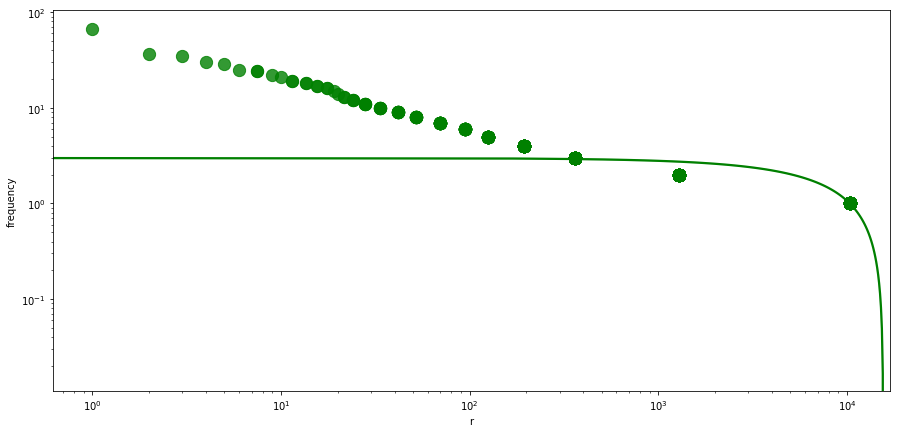

In [15]:
f, ax = plot.subplots(figsize=(15, 7))
ax.set(xscale='log', yscale='log')
sea.regplot('r', 'frequencia', diagramas_df, ax=ax, ci=68, scatter_kws={'s': 150}, color = 'g')

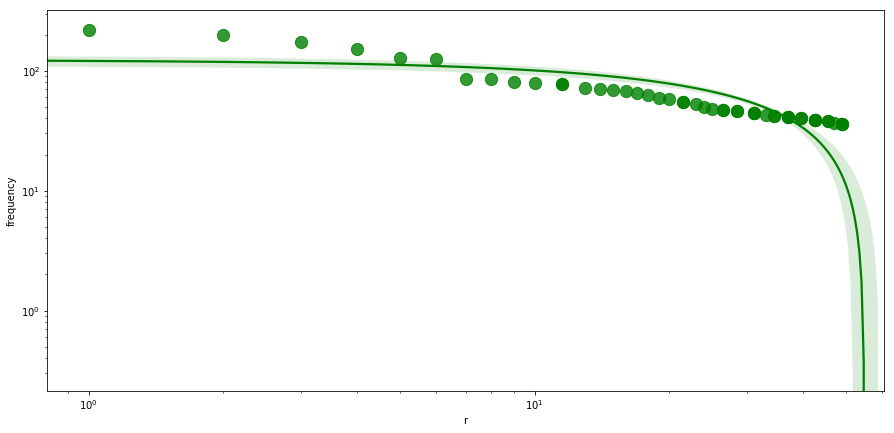

In [16]:
f, ax = plot.subplots(figsize=(15, 7))
ax.set(xscale='log', yscale='log')
sea.regplot('r', 'frequencia', frequency_data_frame, ax=ax, ci=68, scatter_kws={'s': 150}, color = 'g')

## 4. Reproduza a tabela 4.5 do livro texto considerando a sua coleção (5 pts).

In [17]:
c = 0
result = []
for n in range(1,11):
    for j in frequencia.items():
        if j[1] == n:
            c += 1
    tupple = (n, c)
    result.append(tupple)
    c = 0

df = panda.DataFrame(result, columns = ['Number of occurrences', 'Number of words'])
df['Planned proportion'] = (1 / (df['Number of occurrences'] * (df['Number of occurrences'] + 1)))
df['Real proportion'] = (df['Number of words'] / c_palavras)
df

,Number of occurrences,Number of words,Planned proportion,Real proportion
0,1,3460,0.500000,0.155345
1,2,1222,0.166667,0.054865
2,3,550,0.083333,0.024694
3,4,343,0.050000,0.015400
4,5,179,0.033333,0.008037
5,6,145,0.023810,0.006510
6,7,112,0.017857,0.005029
7,8,83,0.013889,0.003726
8,9,71,0.011111,0.003188
9,10,44,0.009091,0.001975
